# Data prepation

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Class transformation
### Train set

In [9]:
train = pd.read_csv('train.csv', index_col='client_id'); train

,treatment_flg,purchased
client_id,,
ad6561e2d8,1,1
7c1ccbf93f,1,1
b58fadcab6,1,1
e99e6fabb9,0,0
27fb6f8520,1,1
...,...,...
999d284453,1,1
f634deea4e,0,1
16cb4f99b0,0,1


In [10]:
train['Z'] =\
    train.purchased * train.treatment_flg + (1 - train.purchased) * (1 - train.treatment_flg)
train

,treatment_flg,purchased,Z
client_id,,,
ad6561e2d8,1,1,1
7c1ccbf93f,1,1,1
b58fadcab6,1,1,1
e99e6fabb9,0,0,1
27fb6f8520,1,1,1
...,...,...,...
999d284453,1,1,1
f634deea4e,0,1,0
16cb4f99b0,0,1,0


In [11]:
train.drop(columns=['purchased', 'treatment_flg'], inplace=True)
train

,Z
client_id,
ad6561e2d8,1
7c1ccbf93f,1
b58fadcab6,1
e99e6fabb9,1
27fb6f8520,1
...,...
999d284453,1
f634deea4e,0
16cb4f99b0,0


Sorting by client_id to make sure that order of client IDs is the same in all files because I will convert them into numpy arrays and the IDs will be lost.

In [12]:
train.sort_index(inplace=True)
train

,Z
client_id,
000012768d,0
000036f903,1
0001f552b0,1
00020e7b18,1
000220a0a7,0
...,...
fffd5cd0c6,1
fffd63dfe3,1
fffd8c9d7d,0


In [13]:
train.to_csv('train_modified.csv')

### Test set. Only sorting is necessary

In [14]:
test = pd.read_csv('test.csv', index_col='client_id')
test.sort_index(inplace=True)
test

""
client_id
00010925a5
00035a21d9
00038f9200
0004315e57
0006fca4bf
...
fff9aa288c
fff9f772f6
fffe0ed719


In [15]:
test.to_csv('test_modified.csv')

# Client data

In [46]:
clients = pd.read_csv('clients2.csv',
                     index_col='client_id',
                     parse_dates=['first_issue_date', 'first_redeem_date'],
                     na_values={'gender': 'U'})\
    .drop(columns='client_id.1')
clients

,first_issue_date,first_redeem_date,age,gender
client_id,,,,
000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,NaN
000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
00010925a5,2018-07-24 16:21:29,2018-09-14 16:12:49,83,NaN
0001f552b0,2017-06-30 19:20:38,2018-08-28 12:59:45,33,F
00020e7b18,2017-11-27 11:41:45,2018-01-10 17:50:05,73,NaN
...,...,...,...,...
fffe0abb97,2017-11-27 08:56:54,2018-02-11 09:26:08,35,F
fffe0ed719,2017-09-15 08:53:24,2017-12-12 14:50:12,69,NaN
fffea1204c,2018-01-31 16:59:37,2018-03-12 17:02:27,73,F


# Age

There are negative values and values above 100 (as high as 1852).

Calculate mean age using clients within reasonable age range:

In [47]:
mean_age = clients.loc[(clients.age < 90) & (clients.age > 10), 'age'].mean()
mean_age

46.37953291808248

In [48]:
clients.loc[(clients.age > 90) | (clients.age < 10), 'age'] = mean_age

In [49]:
clients.age.describe()

count    200039.000000
mean         46.379892
std          15.858605
min          10.000000
25%          34.000000
50%          45.000000
75%          59.000000
max          90.000000
Name: age, dtype: float64

<AxesSubplot: ylabel='Density'>

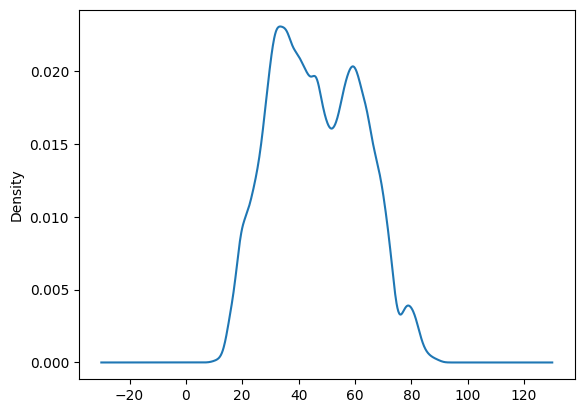

In [50]:
clients.age.plot.kde()

# Gender

In [51]:
clients = pd.get_dummies(clients, columns=['gender'])
clients

,first_issue_date,first_redeem_date,age,gender_F,gender_M
client_id,,,,,
000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,0,0
000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,1,0
00010925a5,2018-07-24 16:21:29,2018-09-14 16:12:49,83.0,0,0
0001f552b0,2017-06-30 19:20:38,2018-08-28 12:59:45,33.0,1,0
00020e7b18,2017-11-27 11:41:45,2018-01-10 17:50:05,73.0,0,0
...,...,...,...,...,...
fffe0abb97,2017-11-27 08:56:54,2018-02-11 09:26:08,35.0,1,0
fffe0ed719,2017-09-15 08:53:24,2017-12-12 14:50:12,69.0,0,0
fffea1204c,2018-01-31 16:59:37,2018-03-12 17:02:27,73.0,1,0


# Issue and redeem dates

## Clients that have not redeemed

In [52]:
clients['no_redeem'] = clients.first_redeem_date.isna().astype('int')

In [53]:
clients.isna().sum()

first_issue_date         0
first_redeem_date    17546
age                      0
gender_F                 0
gender_M                 0
no_redeem                0
dtype: int64

In [54]:
clients.loc[clients.no_redeem == 1, :]

,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,
00068fd5dc,2018-12-15 11:14:26,NaT,72.000000,1,0,1
0006fca4bf,2019-02-20 10:47:30,NaT,57.000000,0,0,1
0009e6bafa,2018-10-01 18:40:29,NaT,32.000000,0,0,1
000d599743,2018-08-29 09:08:39,NaT,46.379533,0,0,1
00140e5d34,2019-03-07 13:10:31,NaT,50.000000,1,0,1
...,...,...,...,...,...,...
ffe2d2bdbc,2018-02-16 12:06:15,NaT,82.000000,0,0,1
ffe4b6aa1a,2019-01-19 19:01:44,NaT,56.000000,0,0,1
fff2b6bf63,2018-10-18 19:01:34,NaT,46.000000,0,0,1


## Use the last redeem date to fill missing values

In [55]:
last_redeem = clients.first_redeem_date.max(); last_redeem

Timestamp('2019-11-20 01:14:10')

In [56]:
clients.fillna(last_redeem, inplace=True)

In [57]:
clients.isna().sum()

first_issue_date     0
first_redeem_date    0
age                  0
gender_F             0
gender_M             0
no_redeem            0
dtype: int64

In [58]:
clients['first_issue_date'] = (clients['first_issue_date'] - pd.Timestamp("1970-01-01")).dt.days
clients['first_redeem_date'] = (clients['first_redeem_date'] - pd.Timestamp("1970-01-01")).dt.days
clients

,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,
000012768d,17383,17535,45.0,0,0,0
000036f903,17266,17279,72.0,1,0,0
00010925a5,17736,17788,83.0,0,0,0
0001f552b0,17347,17771,33.0,1,0,0
00020e7b18,17497,17541,73.0,0,0,0
...,...,...,...,...,...,...
fffe0abb97,17497,17573,35.0,1,0,0
fffe0ed719,17424,17512,69.0,0,0,0
fffea1204c,17562,17602,73.0,1,0,0


### Scaling

In [59]:
contin_vars = ['first_issue_date', 'first_redeem_date', 'age']

In [60]:
scaler = StandardScaler()

In [61]:
scaled = scaler.fit_transform(clients[contin_vars])

In [62]:
clients[contin_vars] = pd.DataFrame(scaled, columns=contin_vars, index=clients.index)
clients

,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,
000012768d,-0.769796,-0.855610,-0.087012,0,0,0
000036f903,-1.344307,-1.861964,1.615538,1,0,0
00010925a5,0.963560,0.138951,2.309169,0,0,0
0001f552b0,-0.946568,0.072123,-0.843701,1,0,0
00020e7b18,-0.210015,-0.832023,1.678595,0,0,0
...,...,...,...,...,...,...
fffe0abb97,-0.210015,-0.706229,-0.717586,1,0,0
fffe0ed719,-0.568471,-0.946024,1.426365,0,0,0
fffea1204c,0.109158,-0.592228,1.678595,1,0,0


In [63]:
clients.to_csv('clients2_modified.csv')

In [69]:
clients_train = clients.join(train, how='right')\
    .drop(columns='Z')
clients_train.sort_index(inplace=True)
clients_train

,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,
000012768d,-0.769796,-0.855610,-0.087012,0,0,0
000036f903,-1.344307,-1.861964,1.615538,1,0,0
0001f552b0,-0.946568,0.072123,-0.843701,1,0,0
00020e7b18,-0.210015,-0.832023,1.678595,0,0,0
000220a0a7,-0.151091,0.217573,-0.000023,0,1,0
...,...,...,...,...,...,...
fffd5cd0c6,-0.966210,0.174331,0.039102,0,1,0
fffd63dfe3,-1.118431,-0.686574,-0.969816,0,0,0
fffd8c9d7d,0.207365,-0.159810,0.102160,1,0,0


In [70]:
clients_train.index.to_list() == train.index.to_list()

True

In [73]:
np.save('clients_train', clients_train.values)

In [74]:
clients_test = clients.join(test, how='right')
clients_test.sort_index(inplace=True)
clients_test

,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,
00010925a5,0.963560,0.138951,2.309169,0,0,0
00035a21d9,1.945631,0.803302,1.426365,0,0,0
00038f9200,1.631368,0.610680,2.056939,0,0,0
0004315e57,1.572444,0.693232,-0.528414,0,0,0
0006fca4bf,1.999645,1.837174,0.669676,0,0,1
...,...,...,...,...,...,...
fff9aa288c,1.542982,0.822957,0.102160,0,0,0
fff9f772f6,-0.823809,0.881923,0.480504,1,0,0
fffe0ed719,-0.568471,-0.946024,1.426365,0,0,0


In [75]:
clients_test.index.to_list() == test.index.to_list()

True

In [76]:
np.save('clients_test', clients_test.values)

# Purchase data aggregation
In this version, I use aggregated data on each transaction day, without data on each individual product in the transaction.

In [10]:
test_purch = pd.read_csv('test_purch.csv', parse_dates=['transaction_datetime'])

In [11]:
train_purch = pd.read_csv('train_purch.csv', parse_dates=['transaction_datetime'])
train_purch

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15998947,fffeca6d22,a0bb11a968,2019-03-09 07:47:43,0.4,0.0,0.0,0.0,99.0,a0613e36b5,de437430e2,1.0,19.0,NaN
15998948,fffeca6d22,a0bb11a968,2019-03-09 07:47:43,0.4,0.0,0.0,0.0,99.0,a0613e36b5,ad8fee4200,1.0,45.0,NaN
15998949,fffeca6d22,3b876a5532,2019-03-15 14:46:39,0.8,0.0,0.0,0.0,165.0,a0613e36b5,ad8fee4200,2.0,94.0,NaN
15998950,fffeca6d22,3b876a5532,2019-03-15 14:46:39,0.8,0.0,0.0,0.0,165.0,a0613e36b5,230dbb0c16,1.0,50.0,NaN


In [12]:
train_purch.transaction_datetime.min()

Timestamp('2018-11-21 21:02:33')

In [13]:
train_purch.transaction_datetime.max()

Timestamp('2019-03-18 23:19:28')

In [14]:
test_purch.transaction_datetime.min()

Timestamp('2018-11-21 21:02:51')

In [15]:
test_purch.transaction_datetime.max()

Timestamp('2019-03-18 22:08:09')

In [16]:
first_day = min(
    train_purch.transaction_datetime.min(),
    test_purch.transaction_datetime.min()
)
first_day

Timestamp('2018-11-21 21:02:33')

In [17]:
test_purch['transaction_day'] = \
(test_purch['transaction_datetime'] - first_day) // pd.Timedelta('1d')
test_purch

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red,transaction_day
0,00010925a5,e91ffe5b50,2018-11-25 10:56:18,1.5,0.0,0.0,0.0,303.0,76d287ce03,a375a035b9,2.0,50.0,NaN,3
1,00010925a5,e91ffe5b50,2018-11-25 10:56:18,1.5,0.0,0.0,0.0,303.0,76d287ce03,6f9e02ee36,1.0,90.0,NaN,3
2,00010925a5,e91ffe5b50,2018-11-25 10:56:18,1.5,0.0,0.0,0.0,303.0,76d287ce03,42e1eb8d23,1.0,20.0,NaN,3
3,00010925a5,e91ffe5b50,2018-11-25 10:56:18,1.5,0.0,0.0,0.0,303.0,76d287ce03,5c6de3010f,2.0,85.0,NaN,3
4,00010925a5,e91ffe5b50,2018-11-25 10:56:18,1.5,0.0,0.0,0.0,303.0,76d287ce03,343e841aaa,1.0,58.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6883733,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,24d5a54f42,1.0,164.0,NaN,113
6883734,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,7427d0830d,1.0,134.0,NaN,113
6883735,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,6c547c2ca8,1.0,60.0,NaN,113
6883736,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,d04e7a8338,1.0,48.0,NaN,113


In [18]:
train_purch['transaction_day'] = \
(train_purch['transaction_datetime'] - first_day) // pd.Timedelta('1d')
train_purch

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red,transaction_day
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN,9
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN,9
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN,9
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN,9
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15998947,fffeca6d22,a0bb11a968,2019-03-09 07:47:43,0.4,0.0,0.0,0.0,99.0,a0613e36b5,de437430e2,1.0,19.0,NaN,107
15998948,fffeca6d22,a0bb11a968,2019-03-09 07:47:43,0.4,0.0,0.0,0.0,99.0,a0613e36b5,ad8fee4200,1.0,45.0,NaN,107
15998949,fffeca6d22,3b876a5532,2019-03-15 14:46:39,0.8,0.0,0.0,0.0,165.0,a0613e36b5,ad8fee4200,2.0,94.0,NaN,113
15998950,fffeca6d22,3b876a5532,2019-03-15 14:46:39,0.8,0.0,0.0,0.0,165.0,a0613e36b5,230dbb0c16,1.0,50.0,NaN,113


In [19]:
test_purch.isna().sum()

client_id                        0
transaction_id                   0
transaction_datetime             0
regular_points_received          0
express_points_received          0
regular_points_spent             0
express_points_spent             0
purchase_sum                     0
store_id                         0
product_id                       0
product_quantity                 0
trn_sum_from_iss                 0
trn_sum_from_red           6426205
transaction_day                  0
dtype: int64

In [20]:
train_purch.isna().sum()

client_id                         0
transaction_id                    0
transaction_datetime              0
regular_points_received           0
express_points_received           0
regular_points_spent              0
express_points_spent              0
purchase_sum                      0
store_id                          0
product_id                        0
product_quantity                  0
trn_sum_from_iss                  0
trn_sum_from_red           14943088
transaction_day                   0
dtype: int64

In [21]:
test_purch.fillna(value=0, inplace=True)

In [22]:
train_purch.fillna(value=0, inplace=True)

In [23]:
test_purch = test_purch\
    .groupby(['client_id','transaction_day'])\
    .agg({'regular_points_received': 'mean',
          'express_points_received': 'mean',
          'regular_points_spent': 'mean', 
          'express_points_spent': 'mean', 
          'purchase_sum': 'mean',
         'product_id': 'count',
         'product_quantity': 'sum',
         'trn_sum_from_iss': 'sum',
         'trn_sum_from_red': 'sum'})
test_purch.rename(columns = {'product_id': 'n_products'}, inplace=True)
test_purch

regular_points_received  express_points_received  \
client_id  transaction_day                                                     
00010925a5 3                               1.500000                      0.0   
           9                               0.800000                      0.0   
           11                              0.700000                      0.0   
           14                              1.700000                      0.0   
           25                              5.800000                      0.0   
...                                             ...                      ...   
fffff6ce77 97                              1.700000                      0.0   
           98                              1.800000                      0.0   
           103                             0.300000                      0.0   
           104                             0.133333                      0.0   
           113                             6.700000                      0.0   

                            regular_points_spent  express_points_spent  \
client_id  transaction_day                                               
00010925a5 3                                 0.0                   0.0   
           9                                 0.0                   0.0   
           11                                0.0                   0.0   
           14                                0.0                   0.0   
           25                                0.0                   0.0   
...                                          ...                   ...   
fffff6ce77 97                                0.0                   0.0   
           98                                0.0                   0.0   
           103                               0.0                   0.0   
           104                               0.0                   0.0   
           113                               0.0                   0.0   

                            purchase_sum  n_products  product_quantity  \
client_id  transaction_day                                               
00010925a5 3                  303.000000           5               7.0   
           9                  132.000000           3               2.0   
           11                 149.000000           3               3.0   
           14                 349.000000           6               7.0   
           25                 581.000000           8               8.0   
...                                  ...         ...               ...   
fffff6ce77 97                 424.000000           5               5.0   
           98                 446.000000           9              10.0   
           103                247.000000           1               1.0   
           104                154.333333           3               3.0   
           113                676.000000           9               9.0   

                            trn_sum_from_iss  trn_sum_from_red  
client_id  transaction_day                                      
00010925a5 3                           303.0               0.0  
           9                           132.0               0.0  
           11                          150.0               0.0  
           14                          349.0               0.0  
           25                          582.0               0.0  
...                                      ...               ...  
fffff6ce77 97                          425.0               0.0  
           98                          446.0               0.0  
           103                         247.0               0.0  
           104                         355.0               0.0  
           113                         676.0               0.0  

[1074611 rows x 9 columns]

In [24]:
train_purch = train_purch\
    .groupby(['client_id','transaction_day'])\
    .agg({'regular_points_received': 'mean',
          'express_points_received': 'mean',
          'regular_points_spent': 'mean', 
          'express_points_spent': 'mean', 
          'purchase_sum': 'mean',
         'product_id': 'count',
         'product_quantity': 'sum',
         'trn_sum_from_iss': 'sum',
         'trn_sum_from_red': 'sum'})
train_purch.rename(columns = {'product_id': 'n_products'}, inplace=True)
train_purch

regular_points_received  express_points_received  \
client_id  transaction_day                                                     
000012768d 9                                  10.00                      0.0   
           24                                  5.70                      0.0   
           106                                 8.00                      0.0   
           112                                 2.00                      0.0   
000036f903 6                                   1.20                      0.0   
...                                             ...                      ...   
fffeca6d22 90                                  6.00                      0.0   
           92                                  7.75                      0.0   
           98                                  0.60                      0.0   
           107                                 0.40                      0.0   
           113                                 0.80                      0.0   

                            regular_points_spent  express_points_spent  \
client_id  transaction_day                                               
000012768d 9                                 0.0                   0.0   
           24                                0.0                   0.0   
           106                               0.0                   0.0   
           112                               0.0                   0.0   
000036f903 6                                 0.0                   0.0   
...                                          ...                   ...   
fffeca6d22 90                                0.0                   0.0   
           92                                0.0                   0.0   
           98                                0.0                   0.0   
           107                               0.0                   0.0   
           113                               0.0                   0.0   

                            purchase_sum  n_products  product_quantity  \
client_id  transaction_day                                               
000012768d 9                 1007.000000          19              21.0   
           24                 574.000000          11              14.0   
           106                803.000000          16              13.0   
           112                419.000000           6               6.0   
000036f903 6                  241.000000           5               4.0   
...                                  ...         ...               ...   
fffeca6d22 90                 129.953333           6               8.0   
           92                 168.333333          12              14.0   
           98                 128.000000           2               3.0   
           107                 99.000000           3               3.0   
           113                165.000000           3               4.0   

                            trn_sum_from_iss  trn_sum_from_red  
client_id  transaction_day                                      
000012768d 9                          1007.0               0.0  
           24                          575.0               0.0  
           106                         804.0               0.0  
           112                         419.0               0.0  
000036f903 6                           241.0               0.0  
...                                      ...               ...  
fffeca6d22 90                          262.0               0.0  
           92                          445.0               0.0  
           98                          128.0               0.0  
           107                         100.0               0.0  
           113                         166.0               0.0  

[2500771 rows x 9 columns]

In [27]:
scaler_2 = StandardScaler().fit(train_purch)

In [28]:
scaled_train = scaler_2.transform(train_purch)

In [29]:
train_purch = pd.DataFrame(scaled_train,
                           columns=train_purch.columns,
                           index=train_purch.index)
train_purch.reset_index(inplace=True)
train_purch

,client_id,transaction_day,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,n_products,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,9,0.761321,-0.02386,0.145803,0.102635,1.142242,2.293052,1.597263,1.006031,-0.173777
1,000012768d,24,0.209042,-0.02386,0.145803,0.102635,0.261120,0.837422,0.739086,0.197471,-0.173777
2,000012768d,106,0.504447,-0.02386,0.145803,0.102635,0.727118,1.747191,0.616489,0.626082,-0.173777
3,000012768d,112,-0.266175,-0.02386,0.145803,0.102635,-0.054293,-0.072346,-0.241688,-0.094510,-0.173777
4,000036f903,6,-0.368925,-0.02386,0.145803,0.102635,-0.416510,-0.254300,-0.486882,-0.427666,-0.173777
...,...,...,...,...,...,...,...,...,...,...,...
2500766,fffeca6d22,90,0.247573,-0.02386,0.145803,0.102635,-0.642481,-0.072346,0.003505,-0.388361,-0.173777
2500767,fffeca6d22,92,0.472337,-0.02386,0.145803,0.102635,-0.564381,1.019376,0.739086,-0.045846,-0.173777
2500768,fffeca6d22,98,-0.445987,-0.02386,0.145803,0.102635,-0.646456,-0.800161,-0.609479,-0.639165,-0.173777
2500769,fffeca6d22,107,-0.471674,-0.02386,0.145803,0.102635,-0.705469,-0.618207,-0.609479,-0.691571,-0.173777


In [31]:
scaled_test = scaler_2.transform(test_purch)

In [32]:
test_purch = pd.DataFrame(scaled_test,
                           columns=test_purch.columns,
                           index=test_purch.index)
test_purch.reset_index(inplace=True)
test_purch

,client_id,transaction_day,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,n_products,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,00010925a5,3,-0.330394,-0.02386,0.145803,0.102635,-0.290345,-0.254300,-0.119091,-0.311623,-0.173777
1,00010925a5,9,-0.420300,-0.02386,0.145803,0.102635,-0.638317,-0.618207,-0.732075,-0.631678,-0.173777
2,00010925a5,11,-0.433143,-0.02386,0.145803,0.102635,-0.603723,-0.618207,-0.609479,-0.597988,-0.173777
3,00010925a5,14,-0.304706,-0.02386,0.145803,0.102635,-0.196738,-0.072346,-0.119091,-0.225526,-0.173777
4,00010925a5,25,0.221885,-0.02386,0.145803,0.102635,0.275364,0.291561,0.003505,0.210572,-0.173777
...,...,...,...,...,...,...,...,...,...,...,...
1074606,fffff6ce77,97,-0.304706,-0.02386,0.145803,0.102635,-0.044119,-0.254300,-0.364285,-0.083280,-0.173777
1074607,fffff6ce77,98,-0.291863,-0.02386,0.145803,0.102635,0.000650,0.473515,0.248699,-0.043974,-0.173777
1074608,fffff6ce77,103,-0.484518,-0.02386,0.145803,0.102635,-0.404300,-0.982115,-0.854672,-0.416436,-0.173777
1074609,fffff6ce77,104,-0.505924,-0.02386,0.145803,0.102635,-0.592870,-0.618207,-0.609479,-0.214296,-0.173777


In [33]:
test_purch.to_csv('test_purch_modified.csv')

In [30]:
train_purch.to_csv('train_purch_modified.csv')

In [3]:
test_purch = pd.read_csv('test_purch_modified.csv', index_col=0)
test_purch

,client_id,transaction_day,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,n_products,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,00010925a5,3,-0.330394,-0.02386,0.145803,0.102635,-0.290345,-0.254300,-0.119091,-0.311623,-0.173777
1,00010925a5,9,-0.420300,-0.02386,0.145803,0.102635,-0.638317,-0.618207,-0.732075,-0.631678,-0.173777
2,00010925a5,11,-0.433143,-0.02386,0.145803,0.102635,-0.603723,-0.618207,-0.609479,-0.597988,-0.173777
3,00010925a5,14,-0.304706,-0.02386,0.145803,0.102635,-0.196738,-0.072346,-0.119091,-0.225526,-0.173777
4,00010925a5,25,0.221885,-0.02386,0.145803,0.102635,0.275364,0.291561,0.003505,0.210572,-0.173777
...,...,...,...,...,...,...,...,...,...,...,...
1074606,fffff6ce77,97,-0.304706,-0.02386,0.145803,0.102635,-0.044119,-0.254300,-0.364285,-0.083280,-0.173777
1074607,fffff6ce77,98,-0.291863,-0.02386,0.145803,0.102635,0.000650,0.473515,0.248699,-0.043974,-0.173777
1074608,fffff6ce77,103,-0.484518,-0.02386,0.145803,0.102635,-0.404300,-0.982115,-0.854672,-0.416436,-0.173777
1074609,fffff6ce77,104,-0.505924,-0.02386,0.145803,0.102635,-0.592870,-0.618207,-0.609479,-0.214296,-0.173777


In [4]:
train_purch = pd.read_csv('train_purch_modified.csv', index_col=0)


In [5]:
test_purch_wide = test_purch.pivot(index='client_id', columns='transaction_day')
test_purch_wide.fillna(0, inplace=True)
test_purch_wide

regular_points_received                                     \
transaction_day                     0    1    2         3    4    5    6     
client_id                                                                    
00010925a5                     0.000000  0.0  0.0 -0.330394  0.0  0.0  0.0   
00035a21d9                     0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
00038f9200                     0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
0004315e57                     0.000000  0.0  0.0  0.170511  0.0  0.0  0.0   
0006fca4bf                     0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
...                                 ...  ...  ...       ...  ...  ...  ...   
fff9aa288c                     0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
fff9f772f6                     0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
fffe0ed719                    -0.389108  0.0  0.0  0.000000  0.0  0.0  0.0   
fffea1204c                     0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
fffff6ce77                     0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   

                                        ... trn_sum_from_red                 \
transaction_day       7    8       9    ...              108       109  110   
client_id                               ...                                   
00010925a5       0.000000  0.0 -0.4203  ...         0.000000  0.000000  0.0   
00035a21d9       0.000000  0.0  0.0000  ...         0.000000  0.000000  0.0   
00038f9200       0.000000  0.0  0.0000  ...         0.000000  0.000000  0.0   
0004315e57       0.000000  0.0  0.0000  ...         0.000000  0.000000  0.0   
0006fca4bf       0.000000  0.0  0.0000  ...        -0.173777  0.000000  0.0   
...                   ...  ...     ...  ...              ...       ...  ...   
fff9aa288c       0.000000  0.0  0.0000  ...         0.000000  0.000000  0.0   
fff9f772f6       0.000000  0.0  0.0000  ...         0.000000  0.000000  0.0   
fffe0ed719       0.000000  0.0  0.0000  ...        -0.173777 -0.173777  0.0   
fffea1204c       0.000000  0.0  0.0000  ...         0.000000  0.000000  0.0   
fffff6ce77       1.942941  0.0  0.0000  ...         0.000000  0.000000  0.0   

                                                                             
transaction_day       111  112       113       114       115       116  117  
client_id                                                                    
00010925a5       0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0  
00035a21d9       0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0  
00038f9200       0.000000  0.0  0.000000  0.000000  0.000000 -0.173777  0.0  
0004315e57       0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0  
0006fca4bf       0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0  
...                   ...  ...       ...       ...       ...       ...  ...  
fff9aa288c       0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0  
fff9f772f6       0.000000  0.0 -0.173777  0.000000  0.000000  0.000000  0.0  
fffe0ed719      -0.173777  0.0 -0.173777 -0.173777 -0.173777 -0.173777  0.0  
fffea1204c      -0.173777  0.0  0.000000  0.000000  0.000000  0.000000  0.0  
fffff6ce77       0.000000  0.0 -0.173777  0.000000  0.000000  0.000000  0.0  

[60012 rows x 1062 columns]

In [6]:
test_purch_wide.sort_index(inplace=True)

In [7]:
test_purch_wide

regular_points_received                                     \
transaction_day                     0    1    2         3    4    5    6     
client_id                                                                    
00010925a5                     0.000000  0.0  0.0 -0.330394  0.0  0.0  0.0   
00035a21d9                     0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
00038f9200                     0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
0004315e57                     0.000000  0.0  0.0  0.170511  0.0  0.0  0.0   
0006fca4bf                     0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
...                                 ...  ...  ...       ...  ...  ...  ...   
fff9aa288c                     0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
fff9f772f6                     0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
fffe0ed719                    -0.389108  0.0  0.0  0.000000  0.0  0.0  0.0   
fffea1204c                     0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
fffff6ce77                     0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   

                                        ... trn_sum_from_red                 \
transaction_day       7    8       9    ...              108       109  110   
client_id                               ...                                   
00010925a5       0.000000  0.0 -0.4203  ...         0.000000  0.000000  0.0   
00035a21d9       0.000000  0.0  0.0000  ...         0.000000  0.000000  0.0   
00038f9200       0.000000  0.0  0.0000  ...         0.000000  0.000000  0.0   
0004315e57       0.000000  0.0  0.0000  ...         0.000000  0.000000  0.0   
0006fca4bf       0.000000  0.0  0.0000  ...        -0.173777  0.000000  0.0   
...                   ...  ...     ...  ...              ...       ...  ...   
fff9aa288c       0.000000  0.0  0.0000  ...         0.000000  0.000000  0.0   
fff9f772f6       0.000000  0.0  0.0000  ...         0.000000  0.000000  0.0   
fffe0ed719       0.000000  0.0  0.0000  ...        -0.173777 -0.173777  0.0   
fffea1204c       0.000000  0.0  0.0000  ...         0.000000  0.000000  0.0   
fffff6ce77       1.942941  0.0  0.0000  ...         0.000000  0.000000  0.0   

                                                                             
transaction_day       111  112       113       114       115       116  117  
client_id                                                                    
00010925a5       0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0  
00035a21d9       0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0  
00038f9200       0.000000  0.0  0.000000  0.000000  0.000000 -0.173777  0.0  
0004315e57       0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0  
0006fca4bf       0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0  
...                   ...  ...       ...       ...       ...       ...  ...  
fff9aa288c       0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0  
fff9f772f6       0.000000  0.0 -0.173777  0.000000  0.000000  0.000000  0.0  
fffe0ed719      -0.173777  0.0 -0.173777 -0.173777 -0.173777 -0.173777  0.0  
fffea1204c      -0.173777  0.0  0.000000  0.000000  0.000000  0.000000  0.0  
fffff6ce77       0.000000  0.0 -0.173777  0.000000  0.000000  0.000000  0.0  

[60012 rows x 1062 columns]

In [16]:
test_purch_wide.index.to_list() == test.index.to_list()

True

In [43]:
test_purch_np = test_purch_wide.values.reshape((-1, 118, 9), order='F')
test_purch_np.shape

(60012, 118, 9)

Checking to make sure that the transformations did not change the data

In [18]:
test_purch.iloc[0].to_list()

['00010925a5',
 3,
 -0.3303936307870475,
 -0.0238598034415103,
 0.1458031522375523,
 0.1026349535759311,
 -0.2903445106052417,
 -0.2542999256702448,
 -0.1190914862416097,
 -0.3116228842758187,
 -0.1737771598133369]

In [44]:
test_purch_np[0, 3, :].tolist()

[-0.3303936307870475,
 -0.0238598034415103,
 0.1458031522375523,
 0.1026349535759311,
 -0.2903445106052417,
 -0.2542999256702448,
 -0.1190914862416097,
 -0.3116228842758187,
 -0.1737771598133369]

In [45]:
test_purch.shape

(1074611, 11)

In [46]:
test_purch.iloc[1074610].to_list()

['fffff6ce77',
 113,
 0.3374785597818206,
 -0.0238598034415103,
 0.1458031522375523,
 0.1026349535759311,
 0.4686821791731513,
 0.473514929732399,
 0.1261020556344992,
 0.3865089160931131,
 -0.1737771598133369]

In [48]:
test_purch_np[60011, 113, :].tolist()

[0.3374785597818206,
 -0.0238598034415103,
 0.1458031522375523,
 0.1026349535759311,
 0.4686821791731513,
 0.473514929732399,
 0.1261020556344992,
 0.3865089160931131,
 -0.1737771598133369]

In [49]:
test_purch.iloc[1074609].to_list()

['fffff6ce77',
 104,
 -0.5059241424109167,
 -0.0238598034415103,
 0.1458031522375523,
 0.1026349535759311,
 -0.5928698936625816,
 -0.6182073533715667,
 -0.6094785699938279,
 -0.2142961989696941,
 -0.1737771598133369]

In [50]:
test_purch_np[60011, 104, :].tolist()

[-0.5059241424109167,
 -0.0238598034415103,
 0.1458031522375523,
 0.1026349535759311,
 -0.5928698936625816,
 -0.6182073533715667,
 -0.6094785699938279,
 -0.2142961989696941,
 -0.1737771598133369]

In [51]:
np.save('test_purch_np', test_purch_np)

### Train set

In [52]:
train_purch_wide = train_purch.pivot(index='client_id', columns='transaction_day')
train_purch_wide.fillna(0, inplace=True)
train_purch_wide

regular_points_received                                \
transaction_day                     0         1         2    3    4     
client_id                                                               
000012768d                          0.0  0.000000  0.000000  0.0  0.0   
000036f903                          0.0  0.000000  0.000000  0.0  0.0   
0001f552b0                          0.0  0.000000  0.645727  0.0  0.0   
00020e7b18                          0.0  3.445653  0.000000  0.0  0.0   
000220a0a7                          0.0  0.000000  0.000000  0.0  0.0   
...                                 ...       ...       ...  ...  ...   
fffd5cd0c6                          0.0  0.000000  0.000000  0.0  0.0   
fffd63dfe3                          0.0  0.000000  0.000000  0.0  0.0   
fffd8c9d7d                          0.0  0.000000  0.000000  0.0  0.0   
fffe0abb97                          0.0  0.000000  0.000000  0.0  0.0   
fffeca6d22                          0.0  0.000000  0.000000  0.0  0.0   

                                                                  ...  \
transaction_day       5         6         7        8         9    ...   
client_id                                                         ...   
000012768d       0.000000  0.000000  0.000000  0.00000  0.761321  ...   
000036f903       0.000000 -0.368925  0.000000  0.00000  0.000000  ...   
0001f552b0       0.000000  0.000000  0.000000  0.00000  0.000000  ...   
00020e7b18       1.236537  0.000000  0.361138  0.00000  0.000000  ...   
000220a0a7       0.000000  0.000000  0.000000  0.00000  0.000000  ...   
...                   ...       ...       ...      ...       ...  ...   
fffd5cd0c6       0.000000  0.000000 -0.471674 -0.42030  0.000000  ...   
fffd63dfe3       0.000000  0.000000  0.000000  0.00000  0.000000  ...   
fffd8c9d7d       0.000000  0.000000  0.000000  0.00000  0.000000  ...   
fffe0abb97       0.000000  0.000000  0.000000  0.19027  0.000000  ...   
fffeca6d22       0.000000  0.000000  0.000000  0.00000  0.000000  ...   

                trn_sum_from_red                                          \
transaction_day              108       109       110       111       112   
client_id                                                                  
000012768d                   0.0  0.000000  0.000000  0.000000 -0.173777   
000036f903                   0.0  0.000000  0.000000  0.000000  0.000000   
0001f552b0                   0.0 -0.173777  0.000000  0.000000 -0.173777   
00020e7b18                   0.0  0.000000  0.000000  0.000000 -0.173777   
000220a0a7                   0.0 -0.173777 -0.173777  0.000000  0.000000   
...                          ...       ...       ...       ...       ...   
fffd5cd0c6                   0.0  0.000000  0.000000  0.000000 -0.173777   
fffd63dfe3                   0.0  0.000000  0.000000 -0.173777  0.000000   
fffd8c9d7d                   0.0  0.000000  0.000000  0.000000  0.000000   
fffe0abb97                   0.0  0.000000  0.000000  0.000000  0.000000   
fffeca6d22                   0.0  0.000000  0.000000  0.000000  0.000000   

                                                              
transaction_day       113       114       115       116  117  
client_id                                                     
000012768d       0.000000  0.000000  0.000000  0.000000  0.0  
000036f903       0.000000  0.000000 -0.173777  0.000000  0.0  
0001f552b0       0.000000 -0.173777  0.000000  0.000000  0.0  
00020e7b18       0.309564  0.000000  0.000000  0.000000  0.0  
000220a0a7       0.000000  0.000000  0.000000  0.000000  0.0  
...                   ...       ...       ...       ...  ...  
fffd5cd0c6      -0.173777 -0.173777  0.000000 -0.173777  0.0  
fffd63dfe3       0.000000  0.000000  0.000000  0.000000  0.0  
fffd8c9d7d       0.000000  0.000000  0.000000  0.000000  0.0  
fffe0abb97       0.073264  0.000000  0.000000  0.000000  0.0  
fffeca6d22      -0.173777  0.000000  0.000000  0.000000  0.0  

[140027 rows x 1062 co

In [53]:
train_purch_wide.sort_index(inplace=True)
train_purch_wide

regular_points_received                                \
transaction_day                     0         1         2    3    4     
client_id                                                               
000012768d                          0.0  0.000000  0.000000  0.0  0.0   
000036f903                          0.0  0.000000  0.000000  0.0  0.0   
0001f552b0                          0.0  0.000000  0.645727  0.0  0.0   
00020e7b18                          0.0  3.445653  0.000000  0.0  0.0   
000220a0a7                          0.0  0.000000  0.000000  0.0  0.0   
...                                 ...       ...       ...  ...  ...   
fffd5cd0c6                          0.0  0.000000  0.000000  0.0  0.0   
fffd63dfe3                          0.0  0.000000  0.000000  0.0  0.0   
fffd8c9d7d                          0.0  0.000000  0.000000  0.0  0.0   
fffe0abb97                          0.0  0.000000  0.000000  0.0  0.0   
fffeca6d22                          0.0  0.000000  0.000000  0.0  0.0   

                                                                  ...  \
transaction_day       5         6         7        8         9    ...   
client_id                                                         ...   
000012768d       0.000000  0.000000  0.000000  0.00000  0.761321  ...   
000036f903       0.000000 -0.368925  0.000000  0.00000  0.000000  ...   
0001f552b0       0.000000  0.000000  0.000000  0.00000  0.000000  ...   
00020e7b18       1.236537  0.000000  0.361138  0.00000  0.000000  ...   
000220a0a7       0.000000  0.000000  0.000000  0.00000  0.000000  ...   
...                   ...       ...       ...      ...       ...  ...   
fffd5cd0c6       0.000000  0.000000 -0.471674 -0.42030  0.000000  ...   
fffd63dfe3       0.000000  0.000000  0.000000  0.00000  0.000000  ...   
fffd8c9d7d       0.000000  0.000000  0.000000  0.00000  0.000000  ...   
fffe0abb97       0.000000  0.000000  0.000000  0.19027  0.000000  ...   
fffeca6d22       0.000000  0.000000  0.000000  0.00000  0.000000  ...   

                trn_sum_from_red                                          \
transaction_day              108       109       110       111       112   
client_id                                                                  
000012768d                   0.0  0.000000  0.000000  0.000000 -0.173777   
000036f903                   0.0  0.000000  0.000000  0.000000  0.000000   
0001f552b0                   0.0 -0.173777  0.000000  0.000000 -0.173777   
00020e7b18                   0.0  0.000000  0.000000  0.000000 -0.173777   
000220a0a7                   0.0 -0.173777 -0.173777  0.000000  0.000000   
...                          ...       ...       ...       ...       ...   
fffd5cd0c6                   0.0  0.000000  0.000000  0.000000 -0.173777   
fffd63dfe3                   0.0  0.000000  0.000000 -0.173777  0.000000   
fffd8c9d7d                   0.0  0.000000  0.000000  0.000000  0.000000   
fffe0abb97                   0.0  0.000000  0.000000  0.000000  0.000000   
fffeca6d22                   0.0  0.000000  0.000000  0.000000  0.000000   

                                                              
transaction_day       113       114       115       116  117  
client_id                                                     
000012768d       0.000000  0.000000  0.000000  0.000000  0.0  
000036f903       0.000000  0.000000 -0.173777  0.000000  0.0  
0001f552b0       0.000000 -0.173777  0.000000  0.000000  0.0  
00020e7b18       0.309564  0.000000  0.000000  0.000000  0.0  
000220a0a7       0.000000  0.000000  0.000000  0.000000  0.0  
...                   ...       ...       ...       ...  ...  
fffd5cd0c6      -0.173777 -0.173777  0.000000 -0.173777  0.0  
fffd63dfe3       0.000000  0.000000  0.000000  0.000000  0.0  
fffd8c9d7d       0.000000  0.000000  0.000000  0.000000  0.0  
fffe0abb97       0.073264  0.000000  0.000000  0.000000  0.0  
fffeca6d22      -0.173777  0.000000  0.000000  0.000000  0.0  

[140027 rows x 1062 co

In [54]:
train_purch_wide.index.to_list() == train.index.to_list()

True

In [55]:
train_purch_np = train_purch_wide.values.reshape((-1, 118, 9), order='F')
train_purch_np.shape

(140027, 118, 9)

Checking to make sure that the transformations did not change the data

In [56]:
train_purch.iloc[0].to_list()

['000012768d',
 9,
 0.7613205268736023,
 -0.0238598034415103,
 0.1458031522375523,
 0.1026349535759311,
 1.1422420566976772,
 2.2930520682390085,
 1.5972633068911537,
 1.0060307014070982,
 -0.1737771598133369]

In [57]:
train_purch_np[0, 9, :].tolist()

[0.7613205268736023,
 -0.0238598034415103,
 0.1458031522375523,
 0.1026349535759311,
 1.1422420566976772,
 2.2930520682390085,
 1.5972633068911537,
 1.0060307014070982,
 -0.1737771598133369]

In [58]:
train_purch.iloc[2500770].to_list()

['fffeca6d22',
 113,
 -0.4202995025943951,
 -0.0238598034415103,
 0.1458031522375523,
 0.1026349535759311,
 -0.5711640365822344,
 -0.6182073533715667,
 -0.4868817990557733,
 -0.5680412667169544,
 -0.1737771598133369]

In [59]:
train_purch_np[140026, 113, :].tolist()

[-0.4202995025943951,
 -0.0238598034415103,
 0.1458031522375523,
 0.1026349535759311,
 -0.5711640365822344,
 -0.6182073533715667,
 -0.4868817990557733,
 -0.5680412667169544,
 -0.1737771598133369]

In [60]:
np.save('train_purch_np', train_purch_np)